# **Importing Libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
import pickle



# **Read Dataset**

In [6]:
df = pd.read_csv("D:\ML\_______PROJECT________\online paymetn fraud detection\data\online_fraud_dataset.csv")

In [7]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [8]:
df.shape

(6362620, 11)

In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
df.drop(['isFlaggedFraud'],axis=1,inplace=True)

In [11]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [12]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 388.3+ MB


In [14]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

# **Data Preprocessing**

 **Handle OUTLIERS**

In [ ]:
sns.boxplot(df['amount'])

In [ ]:
print(stats.mode(df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=np.float64(10000000.0), count=np.int64(3207))
179861.90354913071


In [ ]:
q1 = np.quantile(df['amount'], 0.25)
q3 = np.quantile(df['amount'], 0.75)

IQR = q3 - q1
# The **IQR** is a measure of statistical dispersion, representing the range within which the central 50% of the data lies.
# It is commonly used to identify outliers and understand the spread of the middle portion of the data
upper_bound = q3 + (1.5 * IQR)
lower_bound = q1 - (1.5 * IQR)

print('q1 :', q1)
print('q3 :', q3)
print('IQR :', IQR)
print('Upper-Bound :', upper_bound)
print('Lower-Bound :', lower_bound)
print('Skewed Data :', len(df[df['amount'] > upper_bound]))
print('Skewed Data :', len(df[df['amount'] < lower_bound]))


q1 : 13389.57
q3 : 208721.4775
IQR : 195331.9075
Upper-Bound : 501719.33875
Lower-Bound : -279608.29125
Skewed Data : 338078
Skewed Data : 0


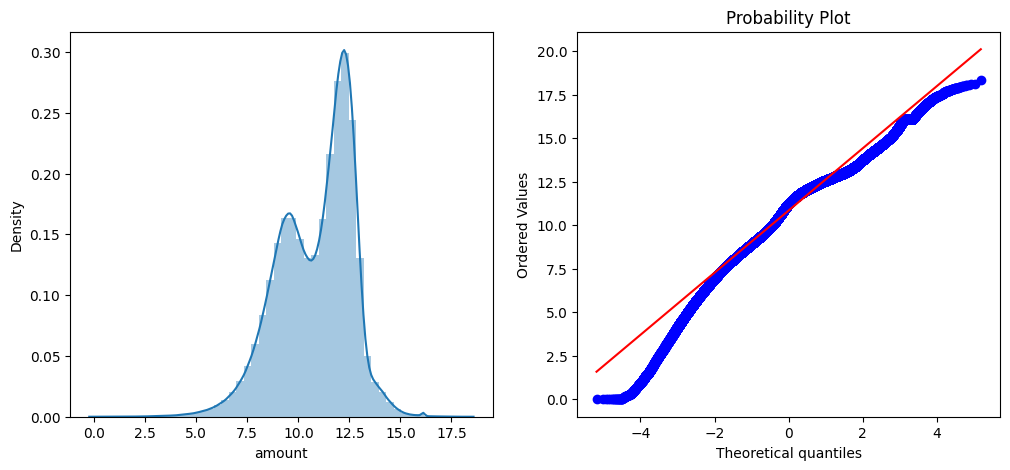

In [ ]:
def transformationplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)
    plt.subplot(1,2,2)
    stats.probplot(feature, plot=plt)

# Use np.log1p to avoid -inf for zero values
transformationplot(np.log1p(df['amount']))

**Object data labelencoding**

In [ ]:
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])

In [ ]:
df['type'].value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [ ]:
X = df.drop('isFraud',axis=1)
y = df['isFraud']

In [ ]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.00,160296.36,0.00,0.00
1,1,3,1864.28,21249.00,19384.72,0.00,0.00
2,1,4,181.00,181.00,0.00,0.00,0.00
3,1,1,181.00,181.00,0.00,21182.00,0.00
4,1,3,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00


In [ ]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5090096, 7) (1272524, 7) (5090096,) (1272524,)


# MODEL BUILDING

**Random Forest Classifier**

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)

Random Forest Accuracy: 0.9997265277511466


In [ ]:
pd.crosstab(y_test, y_pred_rf)

col_0,0,1
isFraud,,
0,1270880,24
1,324,1296


In [ ]:
print("\nCLASSIFICATION MATRIX: ",classification_report(y_test, y_pred_rf))
print("\nCONFUSION MATRIX: ",confusion_matrix(y_test, y_pred_rf))



CLASSIFICATION MATRIX:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.80      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524


CONFUSION MATRIX:  [[1270880      24]
 [    324    1296]]


**Decision Tree Classifier**

In [ ]:
model_dtc = RandomForestClassifier()
model_dtc.fit(X_train, y_train)

y_pred_dtc = model_dtc.predict(X_test)


NameError: name 'X_train' is not defined

In [ ]:
acc_dtc = accuracy_score(y_test, y_pred_dtc)
print("Decision Tree Accuracy:", acc_dtc)

NameError: name 'accuracy_score' is not defined

In [ ]:
pd.crosstab(y_test, y_pred_dtc)

col_0,0,1
isFraud,,
0,1270877,27
1,316,1304


In [ ]:
print("\nCLASSIFICATION MATRIX: ",classification_report(y_test, y_pred_dtc))
print("\nCONFUSION MATRIX: ",confusion_matrix(y_test, y_pred_dtc))


CLASSIFICATION MATRIX:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.80      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524


CONFUSION MATRIX:  [[1270877      27]
 [    316    1304]]


**Extra Tree Classifier**

In [ ]:
model_etc = RandomForestClassifier()
model_etc.fit(X_train, y_train)

y_pred_etc = model_etc.predict(X_test)
acc_etc = accuracy_score(y_test, y_pred_etc)

pd.crosstab(y_test, y_pred_etc)
print("\nCLASSIFICATION MATRIX: ",classification_report(y_test, y_pred_etc))
print("\nCONFUSION MATRIX: ",confusion_matrix(y_test, y_pred_etc))

Random Forest Accuracy: 0.9997296711103287

CLASSIFICATION MATRIX:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.80      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524


CONFUSION MATRIX:  [[1270877      27]
 [    317    1303]]


**SVC**

In [ ]:
print("Extra Tree Accuracy:", acc_etc)

In [ ]:
model_svc = RandomForestClassifier()
model_svc.fit(X_train, y_train)

y_pred_svc = model_svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred_svc)
print("Random Forest Accuracy:", acc_svc)
pd.crosstab(y_test, y_pred_svc)
print("\nCLASSIFICATION MATRIX: ",classification_report(y_test, y_pred_svc))
print("\nCONFUSION MATRIX: ",confusion_matrix(y_test, y_pred_svc))

Random Forest Accuracy: 0.9997296711103287

CLASSIFICATION MATRIX:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.80      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524


CONFUSION MATRIX:  [[1270882      22]
 [    322    1298]]


**XGBoost**


In [ ]:
model_xgb = RandomForestClassifier()
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("Random Forest Accuracy:", acc_xgb)
pd.crosstab(y_test, y_pred_xgb)
print("\nCLASSIFICATION MATRIX: ",classification_report(y_test, y_pred_xgb))
print("\nCONFUSION MATRIX: ",confusion_matrix(y_test, y_pred_xgb))

In [ ]:
print("Random Forest Accuracy:", acc_rf)
print("Decision Tree Accuracy:", acc_dtc)
print("Extra Trees Accuracy:", acc_etc)
print("SVC Accuracy:", acc_svc)
print("XGBoost Accuracy:", acc_xgb)

NameError: name 'acc_rf' is not defined